# Feedforward models: Perceptron and Multi-Layer Perceptron

In this tutorial, we will learn how to use Perceptron and Multi-Layer Perceptron (MLP) neural networks to solve simple classification tasks. We will walk through the necessary steps to implement and train these networks using PyTorch.

## Index
1. Imports
2. Models
    - Perceptron
    - Multi-Layer Perceptron
2. Generating data
3. Training
4. Evaluation


## Imports

In [ ]:
# define the github path and authorization token
RAW_GITHUB_PATH = 'https://raw.githubusercontent.com/bambschool/BAMB2025/main/Day_7_ANNs/'

# define the list of files to be downloaded
files = ['data.py']

for file in files:
    result = !wget -O {file} "{RAW_GITHUB_PATH}{file}"
# List the files in the current directory to verify
!ls -l

In [ ]:
import argparse
from pathlib import Path
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim
import data

## Models

### Perceptron

The Perceptron is one of the simplest types of artificial neural networks. It consists of a single layer of neurons, each with a set of weights and biases. The output of the Perceptron is calculated as the weighted sum of the inputs plus the bias, passed through an activation function.

$$z = \mathbf{w} \cdot \mathbf{x} + b = w_1 x_1 + w_2 x_2 + \ldots + w_n x_n + b$$

$$y = \gamma(z)$$

Where:

- $\mathbf{w}$ is the weight vector
- $\mathbf{x}$ is the input vector
- $b$ is the bias
- $\gamma$ is the sigmoid function.
- $\mathbf{z}$ is called the logit.

To implement the perceptron in PyTorch, we can create a class that inherits from `torch.nn.Module` and the define the different elements of the network in the constructor and the forward pass in the `forward` method. You can use the matrix multiplication operation `torch.matmul` to calculate the weighted sum of the inputs and the bias. 

[Note: although the equations above use the sigmoid function as the activation function, we will not apply it within the model. Instead, we will apply it later when calculating the loss]

In [2]:
class Perceptron(nn.Module):
    def __init__(self, input_size, output_size):
        super(Perceptron, self).__init__()
        # INSTRUCTION 1: set the weights and bias of the perceptron
        self.W = nn.Parameter(torch.randn(output_size, input_size) * 0.01)
        self.b = nn.Parameter(torch.zeros(output_size))

    def forward(self, x):
        # INSTRUCTION 2: implement the forward pass of the perceptron
        x = torch.matmul(x, self.W.T) + self.b
        return x

### Multi-layer perceptron

THe multi-layer perceptron (MLP) is a type of feedforward neural network that consists of multiple layers of neurons. Each layer is fully connected to the next layer. The formula to calculate the output of an MLP is similar to the perceptron, but with the addition of non-linear activation functions between the layers:

$$z^{(1)} = \mathbf{W}^{(1)} \cdot \mathbf{x} + \mathbf{b}^{(1)}$$
$$h^{(1)} = \phi(z^{(1)})$$
$$z^{(2)} = \mathbf{W}^{(2)} \cdot \mathbf{h}^{(1)} + \mathbf{b}^{(2)}$$
$$y = \gamma(z^{(2)})$$

Where:
- x is the input vector.
- $\mathbf{W}^{(1)}$ and $\mathbf{W}^{(2)}$ are the weight matrices of the first and second layers.
- $\mathbf{b}^{(1)}$ and $\mathbf{b}^{(2)}$ are the bias vectors of the first and second layers.
- $\phi$ is the activation function. In this case, we will use the ReLU activation function.
- $\gamma$ is the output activation function. In this case, we will use the sigmoid activation function.
- $\mathbf{z}$ is called the logit.


Note that if we don't include any non-linear activation functions, the MLP is equivalent to a linear regression model. However, by adding non-linear activation functions, the MLP can learn complex patterns in the data. 

[Note: although the equations above use the sigmoid function as the activation function, we will not apply it within the model. Instead, we will apply it later when calculating the loss]

In [3]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, non_linear_activation='relu'):
        super(MLP, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.nla = non_linear_activation
        # INSTRUCTION 3: set the weights and bias of the MLP
        self.W_ih = nn.Parameter(torch.randn(hidden_size, input_size) * 0.01)
        self.b_ih = nn.Parameter(torch.zeros(hidden_size))
        self.W_ho = nn.Parameter(torch.randn(output_size, hidden_size) * 0.01)
        self.b_ho = nn.Parameter(torch.zeros(output_size))

    def forward(self, x):
        
        if self.nla=='':
            # INSTRUCTION 4: apply the first linear layer with no activation function
            h = torch.matmul(x, self.W_ih.T) + self.b_ih
        elif self.nla=='relu':
            # INSTRUCTION 5: apply a ReLU activation function to the hidden layer
            h = torch.relu(torch.matmul(x, self.W_ih.T) + self.b_ih)
        elif self.nla=='sigmoid':
            # INSTRUCTION 6: apply a sigmoid activation function to the hidden layer
            h = torch.sigmoid(torch.matmul(x, self.W_ih.T) + self.b_ih)
        
        # INSTRUCTION 7: apply the second linear layer
        x = torch.matmul(h, self.W_ho.T) + self.b_ho
        return x


## Generating data

We will now generate the data for classification. We will generate two types of data: linearly separable data and non-linearly separable data.
We will also plot the data to visualize it. You will see that the plotting function can call the evaluation function to plot the decision boundary of the model. We will implement this function in the next section.

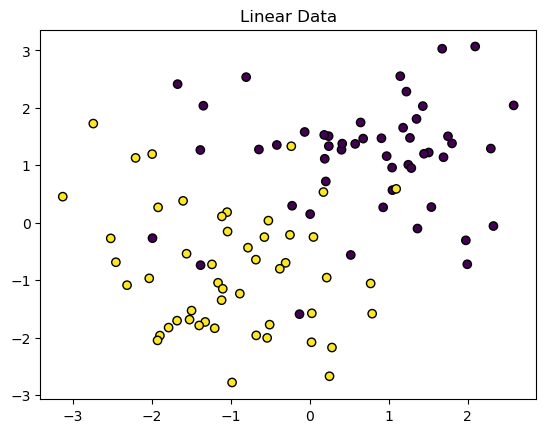

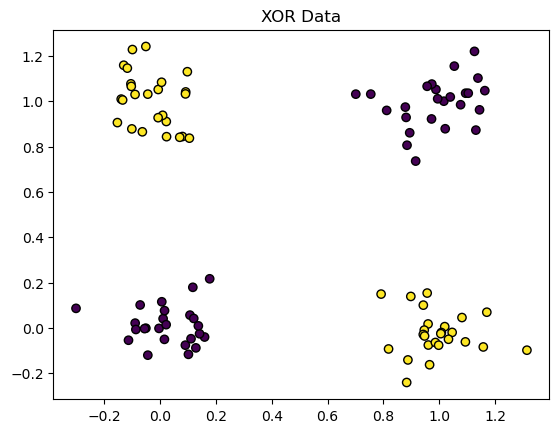

In [ ]:
def evaluate_model(model, grid):
    with torch.no_grad():
        # INSTRUCTION 14: get the model's output
        Z = model(grid)
        # INSRTUCTION 15: apply the sigmoid function to the output
        Z = torch.sigmoid(Z).numpy()
        # INSTRUCTION 16: binarize the output
        Z = (Z > 0.5).astype(int)
    return Z

def plot_decision_boundary(X, Y, title, model=None):
    """
    Function to plot the decision boundary and data points of a model
    """
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
    if model is not None:
        Z = evaluate_model(model, grid) 
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', marker='o')
    plt.title(title)
    plt.show()
    
def generate_linear_data(N=100, D=2):
    """
    Function to generate linearly separable data
    """
    X = np.random.randn(N, D)
    X[:N//2, :] += 1
    X[N//2:, :] -= 1
    Y = np.concatenate((np.zeros(N//2), np.ones(N//2)))
    X = torch.tensor(X, dtype=torch.float32)
    Y = torch.tensor(Y, dtype=torch.long)
    return X, Y

def generate_xor_data(n_points=100):
    """
    Function to generate XOR data
    """
    # Base XOR points
    base_points = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
    base_labels = np.array([0, 1, 1, 0], dtype=np.float32)
    
    # Generate more points around the base points
    X = []
    Y = []
    for _ in range(n_points // 4):
        for point, label in zip(base_points, base_labels):
            noise = np.random.normal(0, 0.1, size=point.shape)
            X.append(point + noise)
            Y.append(label)
    
    X = np.array(X, dtype=np.float32)
    Y = np.array(Y, dtype=np.float32)
    
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    return X, Y
# Task 1: Linearly Separate Two Clouds of Dots
X_linear, Y_linear = generate_linear_data()
input_size = 2
output_size = 1
plot_decision_boundary(X_linear, Y_linear, 'Linear Data')
X_xor, Y_xor = generate_xor_data()
plot_decision_boundary(X_xor, Y_xor, 'XOR Data')

## Training

We will now implement the training and evaluating functions. For the training function, we will use the binary cross-entropy loss with logits, which combines the sigmoid activation function and the binary cross-entropy loss. We will use the Stoachastic Gradient Descent (SGD) optimizer to update the weights of the model.

In [ ]:
def train_model(model,  X, Y, num_epochs=1000, print_interval=100, lr=0.1):
    # INSTRUCTION 8: define the loss function
    criterion = nn.BCEWithLogitsLoss()
    # INSTRUCTION 9: define the optimizer setting the learning rate
    optimizer = optim.SGD(model.parameters(), lr=lr)
    for epoch in range(num_epochs):
        optimizer.zero_grad()
        # INSRTUCTION 10: get the model's output
        outputs = model(X)
        # INSTRUCTION 11: calculate the loss
        loss = criterion(outputs, Y.float().view(-1, 1))
        # INSTRUCTION 12: backpropagate the loss
        loss.backward()
        # INSTRUCTION 13: update the model's parameters
        optimizer.step()
        if (epoch + 1) % print_interval == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

## Testing the models

Let's test the models you have implemented. We will train the models on the linearly separable data and non-linearly separable data and evaluate their performance. We will also plot the decision boundary of the models to visualize how they separate the data.
Things you can play with:
- The number of neurons in the hidden layer of the MLP.
- The learning rate of the optimizer.
- The activation function of the hidden layer of the MLP.
- The number of epochs for training.

Epoch [100/1000], Loss: 0.1946
Epoch [200/1000], Loss: 0.1747
Epoch [300/1000], Loss: 0.1688
Epoch [400/1000], Loss: 0.1663
Epoch [500/1000], Loss: 0.1650
Epoch [600/1000], Loss: 0.1643
Epoch [700/1000], Loss: 0.1639
Epoch [800/1000], Loss: 0.1637
Epoch [900/1000], Loss: 0.1635
Epoch [1000/1000], Loss: 0.1634


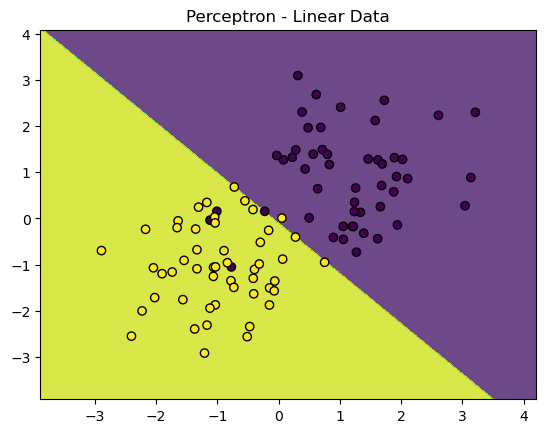

Epoch [100/1000], Loss: 0.6332
Epoch [200/1000], Loss: 0.2664
Epoch [300/1000], Loss: 0.1903
Epoch [400/1000], Loss: 0.1633
Epoch [500/1000], Loss: 0.1501
Epoch [600/1000], Loss: 0.1435
Epoch [700/1000], Loss: 0.1397
Epoch [800/1000], Loss: 0.1365
Epoch [900/1000], Loss: 0.1335
Epoch [1000/1000], Loss: 0.1309


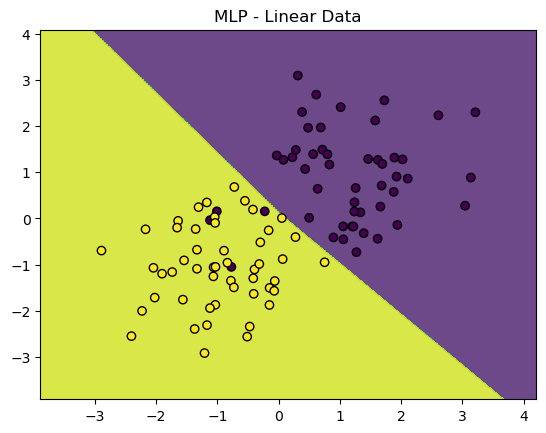

Epoch [1000/1000], Loss: 0.6927


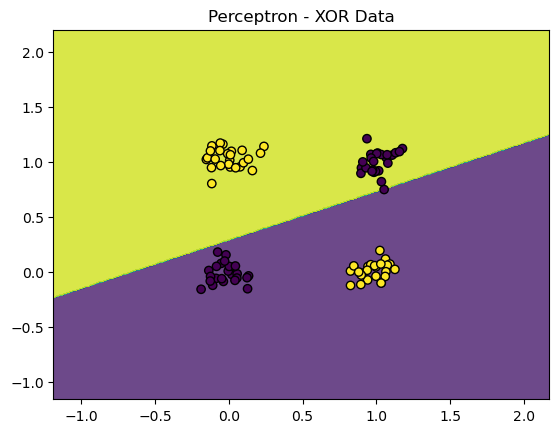

Epoch [1000/1000], Loss: 0.4924


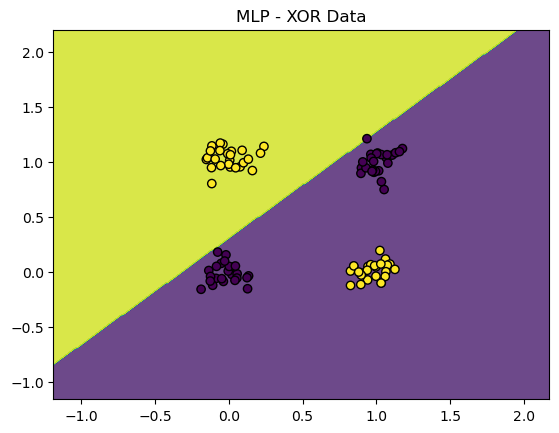

In [6]:
hidden_size = 2  # number of neurons in the hidden layer
lr = 0.1  # learning rate
non_linear_activation = 'relu'  # activation function for the hidden layer
num_epochs = 1000  # number of training epochs

# Task 1: Linearly Separate Two Clouds of Dots
X_linear, Y_linear = generate_linear_data()
input_size = 2
output_size = 1

# Perceptron
model_perceptron = Perceptron(input_size, output_size)
train_model(model_perceptron, X_linear, Y_linear, num_epochs=num_epochs, lr=lr, print_interval=100)
plot_decision_boundary(X_linear, Y_linear, 'Perceptron - Linear Data', model=model_perceptron)

# MLP
model_mlp = MLP(input_size, hidden_size, output_size,
                 non_linear_activation=non_linear_activation)
train_model(model_mlp, X_linear, Y_linear, num_epochs=num_epochs, lr=lr, print_interval=100)
plot_decision_boundary(X_linear, Y_linear, 'MLP - Linear Data', model=model_mlp)

# Task 2: XOR Task
X_xor, Y_xor = generate_xor_data()

# Perceptron
model_perceptron = Perceptron(input_size, output_size)
train_model(model_perceptron, X_xor, Y_xor, num_epochs=num_epochs, lr=lr, print_interval=1000)
plot_decision_boundary(X_xor, Y_xor, 'Perceptron - XOR Data', model=model_perceptron)

# MLP
model_mlp = MLP(input_size, hidden_size, output_size,
                 non_linear_activation=non_linear_activation)
train_model(model_mlp, X_xor, Y_xor, num_epochs=num_epochs, lr=lr, print_interval=1000)
plot_decision_boundary(X_xor, Y_xor, 'MLP - XOR Data', model=model_mlp)

## Convolutional Neural Network (CNN)


In [ ]:

class SimpleCNN(nn.Module):
    """Two‑conv‑layer CNN roughly matching the classic LeNet‑5 architecture (simplified)."""

    def __init__(self):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),  # → 14×14
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),  # → 7×7
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 7 * 7, 128),
            nn.ReLU(inplace=True),
            nn.Dropout(0.25),
            nn.Linear(128, 10),
        )

    def forward(self, x):
        x = self.features(x)
        return self.classifier(x)


def train_epoch(model, loader, criterion, optimizer, device):
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    for inputs, targets in loader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, preds = outputs.max(1)
        correct += preds.eq(targets).sum().item()
        total += targets.size(0)

    return running_loss / total, correct / total


def evaluate(model, loader, criterion, device):
    model.eval()
    running_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for inputs, targets in loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            running_loss += loss.item() * inputs.size(0)
            _, preds = outputs.max(1)
            correct += preds.eq(targets).sum().item()
            total += targets.size(0)

    return running_loss / total, correct / total


def main(argv=None):
    parser = argparse.ArgumentParser(description="Train a simple CNN on MNIST")
    parser.add_argument("--epochs", type=int, default=5)
    parser.add_argument("--batch-size", type=int, default=64)
    parser.add_argument("--lr", type=float, default=1e-3)
    parser.add_argument("--save-path", type=Path, default=Path("mnist_cnn.pt"))

    # Parse KNOWN args so that unknown Jupyter/IPython flags are ignored.
    args, unknown = parser.parse_known_args(args=argv)
    if unknown:
        print(f"[INFO] Ignored unknown CLI args: {unknown}")

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    train_loader, test_loader = data.get_data_loaders(batch_size=args.batch_size)

    model = SimpleCNN().to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=args.lr)

    for epoch in range(1, args.epochs + 1):
        train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, device)
        test_loss, test_acc = evaluate(model, test_loader, criterion, device)
        print(
            f"Epoch {epoch:02d}/{args.epochs}: "
            f"train loss {train_loss:.3f}, train acc {train_acc:.3%} — "
            f"test loss {test_loss:.3f}, test acc {test_acc:.3%}"
        )

    torch.save(model.state_dict(), args.save_path)
    print(f"Model saved to {args.save_path}")


In [18]:
main()

[INFO] Ignored unknown CLI args: ['--f=/run/user/1000/jupyter/runtime/kernel-v350579599452b8c14a942af0d901dcd1c1b36ea95.json']
Failed to download (trying next):
HTTP Error 404: Not Found



100.0%


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100.0%


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100.0%


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100.0%

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Epoch 01/5: train loss 0.153, train acc 95.233% — test loss 0.048, test acc 98.560%
Epoch 02/5: train loss 0.056, train acc 98.278% — test loss 0.033, test acc 98.950%
Epoch 03/5: train loss 0.040, train acc 98.717% — test loss 0.034, test acc 98.820%
Epoch 04/5: train loss 0.031, train acc 98.958% — test loss 0.026, test acc 99.170%
Epoch 05/5: train loss 0.024, train acc 99.242% — test loss 0.022, test acc 99.280%
Model saved to mnist_cnn.pt
